In [1]:
 library(BGLR); data(wheat)
 X=scale(wheat.X)/sqrt(ncol(wheat.X))
 
 h2_0=.5
 nQTL=10; n=nrow(X)
 QTL=seq(from=100, to=1200,length=nQTL)
 
 b=rnorm(nQTL)
 signal=X[,QTL]%*%b
 signal=signal/sd(signal)*sqrt(h2_0)
 error=rnorm(n=n)
 error=error/sd(error)*sqrt(1-h2_0)
 y=signal+error

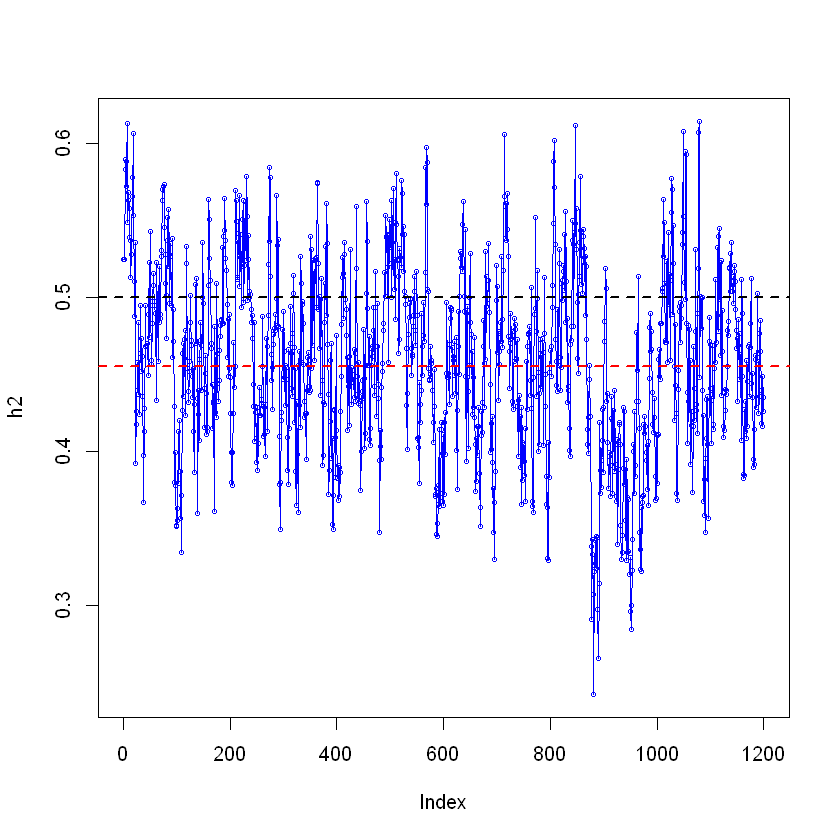

In [3]:
h20=.5
fm=BGLR(y=y,ETA=list(list(X=X,model='BRR',saveEffects=T)),nIter=6000,burnIn=1000,verbose=F)
 varU=scan('ETA_1_varB.dat')
 varE=scan('varE.dat')
 h2=varU/(varU+varE)
 plot(h2,type='o',cex=.5,col=4);abline(h=c(h20,mean(h2[-c(1:200)])),lty=2,col=c(1,2),lwd=2)

[1] 0.4524831

[1] 0.978787

[1] 1.009966

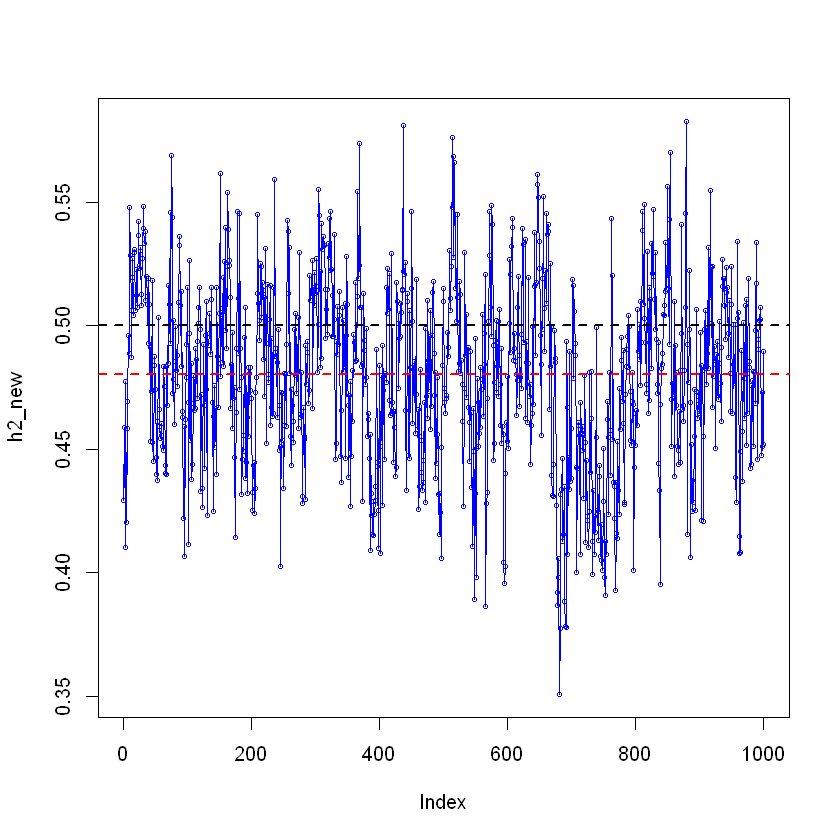

In [12]:
B=readBinMat('ETA_1_b.bin')
 h2_new=rep(NA,nrow(B))
 varU_new=h2_new
 varE_new=h2_new
 for(i in 1:length(h2_new)){
   u=X%*%B[i,]	
   varU_new[i]=var(u)
   varE_new[i]=var(y-u)
   h2_new[i]=varU_new[i]/(varU_new[i]+varE_new[i])
 }
  plot(h2_new,type='o',cex=.5,col=4);abline(h=c(h2_0,mean(h2_new)),lty=2,col=c(1,2),lwd=2)
 mean(varU)
 mean(varU+varE)
 mean(varU_new+varE_new)

Warning message in plot.formula(numeric() ~ numeric(), ylim = range(c(d_h2$y, d_h2_new$y)), :
"the formula 'numeric() ~ numeric()' is treated as 'numeric() ~ 1'"

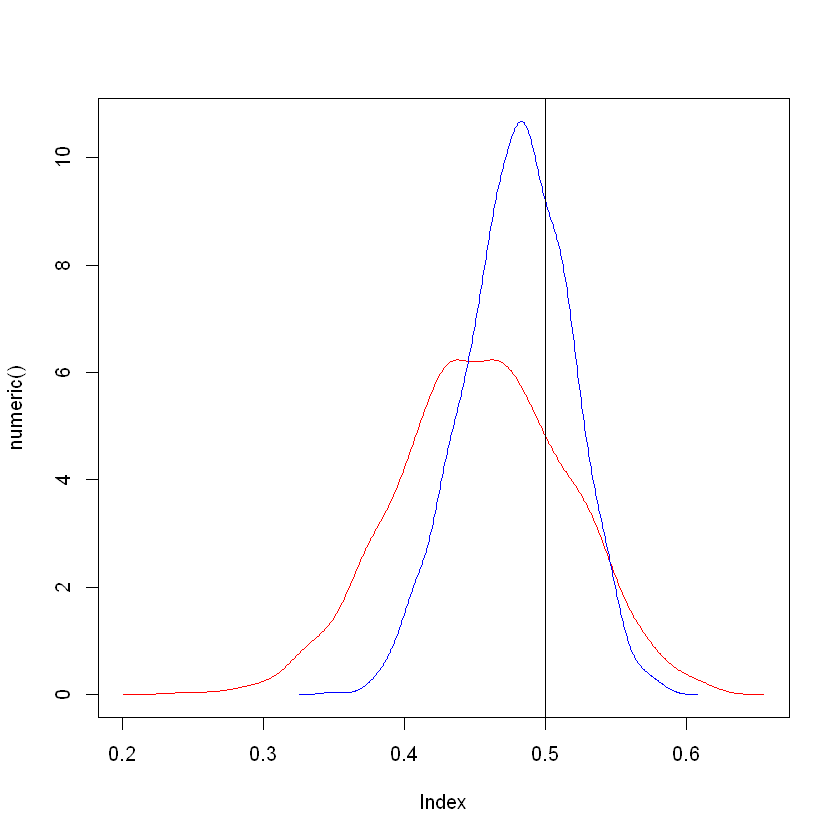

In [13]:
  d_h2=density(h2[-c(1:200)])
  d_h2_new=density(h2_new)
  plot(numeric()~numeric(),ylim=range(c(d_h2$y,d_h2_new$y)),xlim=range(c(d_h2$x,d_h2_new$x)) )
  lines(x=d_h2$x,y=d_h2$y,col=2)
  lines(x=d_h2_new$x,y=d_h2_new$y,col=4)
  h20=.5
  abline(v=h20) 